# <span style='color:Red'> Regression Model on Household Electricity Consumption </span> 

Submitted by:- Ambarish Singh



## <span style='color:Green'> Problem Statement </span> 

- Predict the household power counsumtion

### <span style='color:Green'> Task Peformed in this Notebook:- </span> 

1. Load Data
2. Exploratory data analysis
3. Check and remove any special character
4. Handle the null Values
5. Graphical Analysis
6. Check and Handle the outliers
7. Train Test Split
8. Model building for :
	- Linear Regression
	- Ridge Regression
	- Lasso Regression
    - ElasticNet Regression
	- Support Vector Regression
	- Decision Tree Regressor
	- Random Forest Regressor
	- Bagging Regressor
9. check for all models:
	- mean_squared_error
	- mean_absolute_error
	- r2_score
	- Adjusted r2_score
10. Hyper-Parameter tuning using RandomSearchCV on:
	- Random Forest Regessor
	- Bagging Regressor
11. Summary
12. Store the best model in pickle file

### <span style='color:Green'> Description </span> 

- The dataset is collected from UCI website, provided by Senior Researchers from France.
- More then 2 million records
- Data of 47 months ranging from December 2006 to November 2010.
- Dataset has 9 attributes, out of which 3 are meter readings stating how much electricity unit appliances of various type has consumed.


In [8]:
## comment
## Observation

### <span style='color:Green'> Importing required libraries </span> 


In [48]:
# Data Analysing 
import pandas as pd
import numpy as np

# Graphical analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for model building
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

# save the model
import pickle


### <span style='color:Green'> Load dataset </span> 


In [4]:
## Loading Dataset
df = pd.read_csv(r"household_power_consumption.txt",sep=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
## Checking Shape of Dataset
df.shape

(2075259, 9)

#### <span style='color: blue'> Observations </span>

- Data is very big so we have to take small sample for model building

In [6]:
## Creating 60,000 Sample Data from Original dataset
df_sample = df.sample(60000)

In [7]:
## Checking Sample shape of newly created sample dataset. 
df_sample.shape

(60000, 9)

#### <span style='color: blue'> Observations </span>

- We have taken 60000 samples out of 2 million to build model

## <span style='color:Green'> EDA </span>


In [9]:
## Checking all Columns Available in a dataset
df_sample.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

### <span style='color:Green'> Drop Date and time columns </span>

In [10]:
## Droping Unnecessary columns from dataset
df_sample.drop(['Date','Time'],axis = 1, inplace = True)

In [11]:
## checking Top 5 rows from dataset
df_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1773,0.914,0.206,246.160,3.800,0.000,0.000,0.0
1874584,0.346,0.000,240.160,1.400,0.000,0.000,0.0
604094,0.296,0.082,244.350,1.200,0.000,0.000,0.0
1998496,0.474,0.000,240.940,2.000,0.000,2.000,0.0
1636101,2.670,0.118,236.060,11.200,0.000,1.000,18.0


### <span style='color:Green'>Check any special character </span>

In [12]:
## Checking any special character are present in a dataset or not.
special_char = df_sample[df_sample['Voltage'] == "?"]
special_char

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1931833,?,?,?,?,?,?,NaN
1985001,?,?,?,?,?,?,NaN
1713833,?,?,?,?,?,?,NaN
1987508,?,?,?,?,?,?,NaN
192536,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...
1930378,?,?,?,?,?,?,NaN
1988688,?,?,?,?,?,?,NaN
1988393,?,?,?,?,?,?,NaN
1619355,?,?,?,?,?,?,NaN


### <span style='color:Green'> Drop these records having special character </span>


In [13]:
print("Data before special characters", df_sample.shape)
df_sample.drop(special_char.index,axis= 0,inplace=True)
print("Data before removal of special characters", df_sample.shape)

Data before special characters (60000, 7)
Data before removal of special characters (59261, 7)


### <span style='color:Green'> Check duplicated </span>


In [14]:
## Checking Total Duplicate rows present in a dataset.
df_sample.duplicated().sum()

276

In [15]:
## Droping Duplicate Rows from dataset and also checking shape of dataset.
print("Data before duplicate records", df_sample.shape)
df_sample.drop_duplicates(inplace=True)
print("Data after removal of duplicate records", df_sample.shape)

Data before duplicate records (59261, 7)
Data after removal of duplicate records (58985, 7)


### <span style='color:Green'> Check the null values </span>

In [17]:
## Checking Total Null Value present in a dataset.
df_sample.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

#### <span style='color: blue'> Observations </span>

- No Null Value

### <span style='color:Green'> Convert all dtypes to float </span>

In [18]:
## Checking dtypes for all Columns present in a dataset
df_sample.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [19]:
## Converting all Columns dtype to Float type
df_sample = df_sample.astype(float)

In [20]:
## Checking dtypes after converting all columns dtype to float
df_sample.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

### <span style='color:Green'> Combine reading of sub_metering_1,sub_metering_2 and sub_metering_3 </span>

In [21]:
## Checking all Columns name Present in a dataset
df_sample.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [22]:
## Combining 3 submeter into one main meter.
df_sample['meter'] =df_sample['Sub_metering_1'] + df_sample['Sub_metering_2'] + df_sample['Sub_metering_3']

### <span style='color:green'> Drop 3 columns </span>

In [23]:
## Droping 3 Sub-meter columns from dataset.
df_sample.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis = 1,inplace = True)

In [24]:
## Checking top 5 rows from dataset
df_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meter
1773,0.914,0.206,246.16,3.8,0.0
1874584,0.346,0.000,240.16,1.4,0.0
604094,0.296,0.082,244.35,1.2,0.0
1998496,0.474,0.000,240.94,2.0,2.0
1636101,2.670,0.118,236.06,11.2,19.0


In [25]:
## Checking basic Statistics method with the help of Describe()
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,58985.0,1.104116,1.068752,0.078,0.310,0.618,1.536,9.732
Global_reactive_power,58985.0,0.123839,0.112869,0.000,0.048,0.100,0.194,1.040
Voltage,58985.0,240.829027,3.239738,225.250,239.000,240.990,242.860,253.530
Global_intensity,58985.0,4.680766,4.495246,0.200,1.400,2.800,6.400,42.000
meter,58985.0,8.983013,13.037285,0.000,0.000,1.000,18.000,133.000


### <span style='color:Green'> Graphical Representation </span>


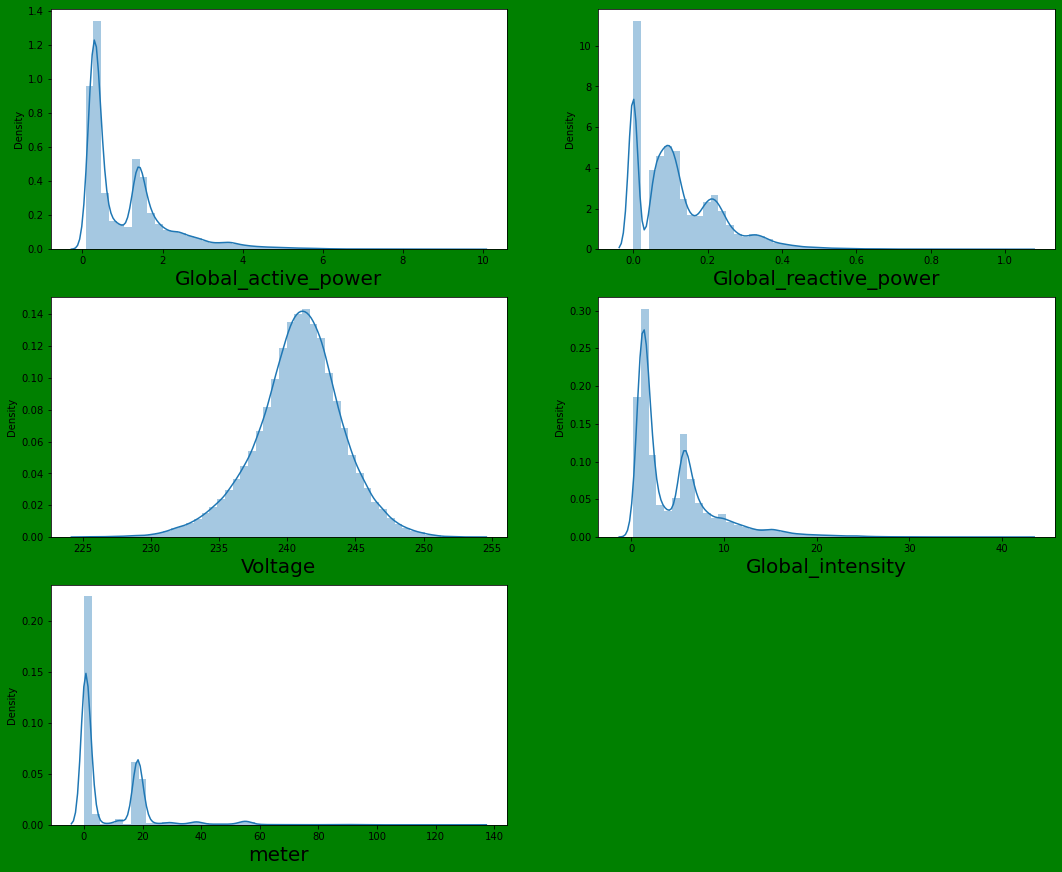

In [28]:
## Let's see data distribution in each column

plt.figure(figsize=(18,15), facecolor='green')
plotnumber = 1

for column in df_sample.columns[:]:
    if plotnumber<=5 :
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df_sample[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### <span style='color:Green'> Check the outliers </span>


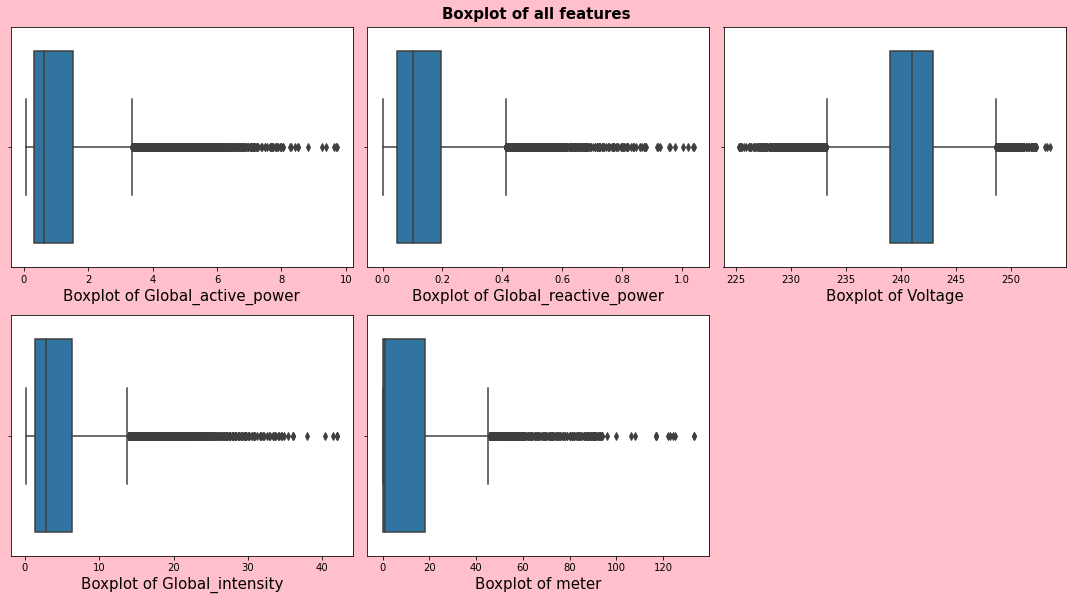

In [33]:
## Checking Outlier in Dataset
plt.figure(figsize=(15,20),facecolor='pink')
plt.suptitle("Boxplot of all features", fontweight = 'bold', fontsize = 15,y = 0.989)
for i in range(0,len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = df_sample.columns[i], data = df_sample)
    plt.xlabel("Boxplot of {}".format(df_sample.columns[i]),fontsize = 15)
    plt.tight_layout()

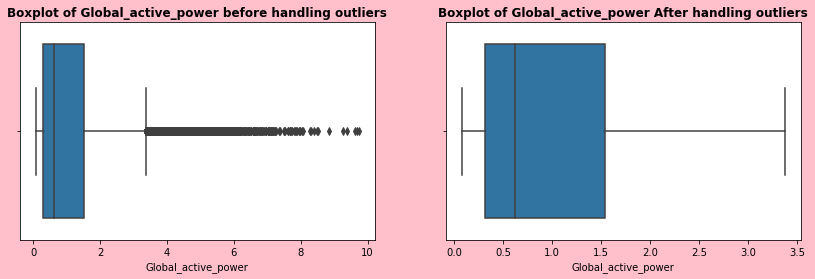

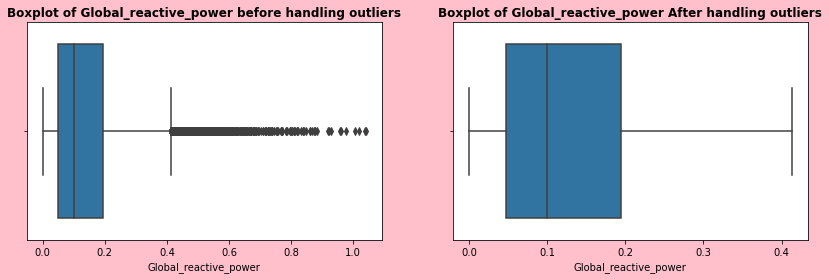

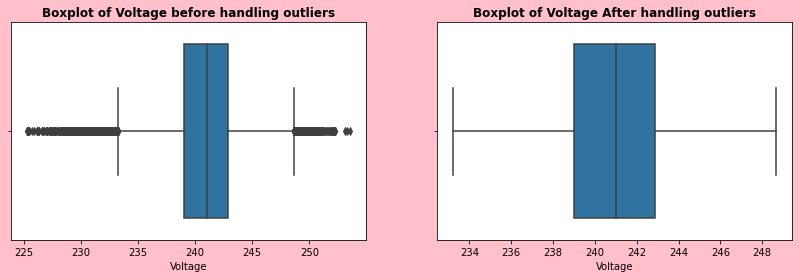

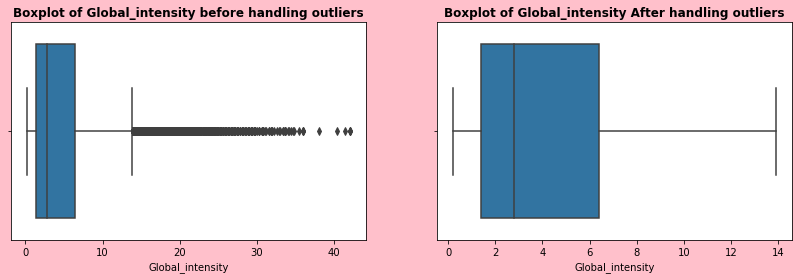

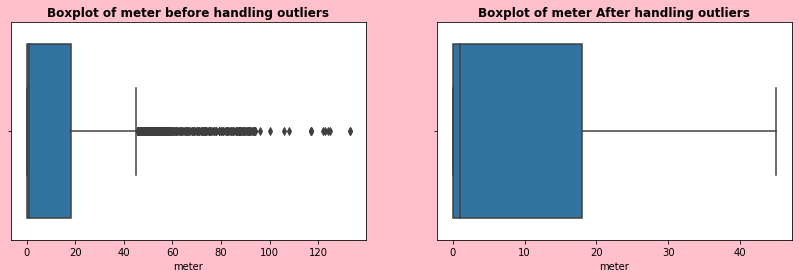

In [68]:
## Handling the outliers
df1 = df_sample.copy()
feature_to_use = df1.columns

for i in range(len(feature_to_use)):
    IQR = df1[feature_to_use[i]].quantile(0.75) - df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit = df1[feature_to_use[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[feature_to_use[i]].quantile(0.75) + (1.5*IQR)
    df1[feature_to_use[i]]= np.where(df1[feature_to_use[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))


for fea in feature_to_use:
    plt.figure(figsize = (14,4),facecolor='pink')
    plt.subplot(121)
    sns.boxplot(x = fea, data = df_sample)
    plt.title("Boxplot of {} before handling outliers".format(fea),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = fea, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(fea),fontweight = 'bold')
    plt.show()

## <span style='color:Green'> Seperate Independent and Dependent Features </span>


In [37]:
x = df1.drop('meter', axis = 1)
y = df1['meter']

In [40]:
## Cheking Shape of x and y 
x.shape, y.shape

((58985, 4), (58985,))

## <span style='color:Green'> Train Test Split </span>

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42 )

In [44]:
## Ckecking the shape of Training Data
x_train.shape,y_train.shape

((39519, 4), (39519,))

In [45]:
## Ckecking the shape of Testing Data
x_test.shape,y_test.shape

((19466, 4), (19466,))

## <span style='color:Green'> Standardization </span>


In [46]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# <span style='color:red'> Model Building </span>

In [47]:
report = []

In [49]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso Regression" : Lasso(),
    "ElasticNet Regression" : ElasticNet(),
    "Support Vector Regression" : SVR(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)   # Training Model

    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training Data perfomance Matrix
    model_train_mse = mean_squared_error(y_train,y_train_pred)   # Calculate MSE
    model_train_mae = mean_absolute_error(y_train,y_train_pred)  # Calculate MAE
    model_train_r2 = r2_score(y_train,y_train_pred)              # Calculate 2 sqaure
    model_train_ad_r2 = 1 - (1-model_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)

    
    # Test Data perfomance Matrix
    model_test_mse = mean_squared_error(y_test,y_test_pred)   # Calculate MSE
    model_test_mae = mean_absolute_error(y_test,y_test_pred)  # Calculate MAE
    model_test_r2 = r2_score(y_test,y_test_pred)              # Calculate 2 sqaure
    model_test_ad_r2 = 1 - (1-model_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)


    report.append({
                    "model" : (list(models.keys()))[i],
                    'Train Mean Squared Error ' : model_train_mse,
                    'Test Mean Squared Error' : model_test_mse,
                    'Train Mean Absolute Error' : model_train_mae,
                    'Test Mean Absolute Error' : model_test_mae,
                    'Train R Sqaure' : model_train_r2,
                    'Test R Sqaure' : model_test_r2,
                    'Train Adj R Sqaure' : model_train_ad_r2,
                    'Test Adj R Sqaure' : model_test_ad_r2
    })

all_model = pd.DataFrame(report)
all_model

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Linear Regression,40.317066,38.626226,4.227816,4.118774,0.692251,0.697878,0.692220,0.697816
1,Ridge Regression,40.317870,38.619047,4.226963,4.117645,0.692245,0.697934,0.692214,0.697872
2,Lasso Regression,42.259282,40.205873,4.489305,4.388920,0.677426,0.685522,0.677393,0.685458
3,ElasticNet Regression,46.791558,44.627403,5.048629,4.955296,0.642830,0.650939,0.642794,0.650867
4,Support Vector Regression,39.213283,39.200943,3.114148,3.059588,0.700677,0.693383,0.700646,0.693320
5,Decision Tree Regressor,0.583525,61.139598,0.045608,3.666033,0.995546,0.521786,0.995545,0.521687
6,Random Forest Regressor,5.270498,34.186604,1.164584,3.039165,0.959769,0.732603,0.959765,0.732548


## <span style='color:Green'> Hyper-Parameter Tunning on RandomSearchCV </span>


In [50]:
Ran_param = {
    "max_depth" : [5,8,15,None,10],
    'max_features' : [3,'auto'],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [50,100,200,500]
}

In [51]:
random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                   param_distributions = Ran_param,
                   n_iter= 100,
                   cv = 3,
                   verbose = 2,
                   n_jobs=-1)

In [52]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [53]:
random.best_params_,random.best_estimator_

({'n_estimators': 500,
  'min_samples_split': 20,
  'max_features': 3,
  'max_depth': 10},
 RandomForestRegressor(max_depth=10, max_features=3, min_samples_split=20,
                       n_estimators=500))

In [54]:
rf_best_para = RandomForestRegressor(max_depth=10, max_features=3, min_samples_split=20,
                                    n_estimators=500)

rf_best_para.fit(x_train,y_train)

# make predictions
rf_pred_train = rf_best_para.predict(x_train)
rf_pred_test = rf_best_para.predict(x_test)

# Training dataset performance matrix
rf_train_mse = mean_squared_error(y_train,rf_pred_train)   # Calculate MSE
rf_train_mae = mean_absolute_error(y_train,rf_pred_train)  # Calculate MAE
rf_train_r2 = r2_score(y_train,rf_pred_train)              # Calculate 2 sqaure
rf_train_ad_r2 = 1 - (1-rf_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)


# Test Data perfomance Matrix
rf_test_mse = mean_squared_error(y_test,rf_pred_test)   # Calculate MSE
rf_test_mae = mean_absolute_error(y_test,rf_pred_test)  # Calculate MAE
rf_test_r2 = r2_score(y_test,rf_pred_test)              # Calculate 2 sqaure
rf_test_ad_r2 = 1 - (1-rf_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

print("\n")
print("Hyperparameter tuning on random forest")

print("Model Performance For Training Data")
print("-Mean Squared Error : {:4f}".format(rf_train_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_train_mae))
print("-R Sqaure : {:.4f}".format(rf_train_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_train_ad_r2))

print("-----------------------------------------------------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error : {:4f}".format(rf_test_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_test_mae))
print("-R Sqaure : {:.4f}".format(rf_test_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_test_ad_r2))



Hyperparameter tuning on random forest
Model Performance For Training Data
-Mean Squared Error : 27.816961
-Mean Absolute Error : 2.8878
-R Sqaure : 0.7877
-Adj R Sqaure : 0.7876
-----------------------------------------------------------------------
Model Performance For Test Data
-Mean Squared Error : 31.002924
-Mean Absolute Error : 2.9927
-R Sqaure : 0.7575
-Adj R Sqaure : 0.7575


In [55]:
rf_record = []
rf_record.append({
                    "model" : "Hyper-Parameter Tunning on random forest",
                    "Train Mean Squared Error " : rf_train_mse,
                    "Test Mean Squared Error" : rf_test_mse,
                    "Train Mean Absolute Error" : rf_train_mae,
                    "Test Mean Absolute Error" : rf_test_mae,
                    "Train R Sqaure" : rf_train_r2,
                    "Test R Sqaure" : rf_test_r2,
                    "Train Adj R Sqaure" : rf_train_ad_r2,
                    "Test Adj R Sqaure" : rf_test_ad_r2
                    })

Hypertuned_rf = pd.DataFrame(rf_record)
Hypertuned_rf

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Hyper-Parameter Tunning on random forest,27.816961,31.002924,2.887815,2.992724,0.787667,0.757505,0.787646,0.757455


## <span style='color:Green'> Bagging Regressor </span>


In [70]:
report2 = []
# Bagging using DecisionTreeRegressor
dt_bag = BaggingRegressor(n_estimators=100)
#If None, then the base estimator is a DecisionTreeRegressor.
dt_bag.fit(x_train,y_train)

# Make predictions
train_pred_bag =dt_bag.predict(x_train)
test_pred_bag = dt_bag.predict(x_test)

# Training dataset performance matrix
bag_train_mse = mean_squared_error(y_train,train_pred_bag)   # Calculate MSE
bag_train_mae = mean_absolute_error(y_train,train_pred_bag)  # Calculate MAE
bag_train_r2 = r2_score(y_train,train_pred_bag)              # Calculate 2 sqaure
bag_train_ad_r2 = 1 - (1-bag_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)


# Test Data perfomance Matrix
bag_test_mse = mean_squared_error(y_test,test_pred_bag)   # Calculate MSE
bag_test_mae = mean_absolute_error(y_test,test_pred_bag)  # Calculate MAE
bag_test_r2 = r2_score(y_test,test_pred_bag)              # Calculate 2 sqaure
bag_test_ad_r2 = 1 - (1-bag_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)



report2.append({
                "model" : 'Bagging Regressor',
                'Train Mean Squared Error ' : bag_train_mse,
                'Test Mean Squared Error' : bag_test_mse,
                'Train Mean Absolute Error' : bag_train_mae,
                'Test Mean Absolute Error' : bag_test_mae,
                'Train R Sqaure' : bag_train_r2,
                'Test R Sqaure' : bag_test_r2,
                'Train Adj R Sqaure' : bag_train_ad_r2,
                'Test Adj R Sqaure' : bag_test_ad_r2
})

Bagging_report = pd.DataFrame(report2)
Bagging_report

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Bagging Regressor,5.268974,34.155725,1.160452,3.03411,0.959781,0.732845,0.959777,0.73279


## <span style='color:Green'> Hyper-parameter tunning of bagging regressor </span>


In [58]:
bag_param = {
            'n_estimators' : [50,100,200,500],
            'max_samples' : range(2,5,1),
            'max_features' : [2,3]
}

In [59]:
bag_ran_search = RandomizedSearchCV(estimator=dt_bag, 
                    param_distributions= bag_param, 
                    n_iter=100,
                    n_jobs=-1,
                    cv = 3,
                    verbose= 2
                    )

In [60]:
bag_ran_search.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


RandomizedSearchCV(cv=3, estimator=BaggingRegressor(n_estimators=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': [2, 3],
                                        'max_samples': range(2, 5),
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [61]:
bag_ran_search.best_params_,bag_ran_search.best_estimator_

({'n_estimators': 50, 'max_samples': 4, 'max_features': 3},
 BaggingRegressor(max_features=3, max_samples=4, n_estimators=50))

In [62]:
bag_model_hyp =  BaggingRegressor(max_features=4, max_samples=10, n_estimators=50)
bag_model_hyp.fit(x_train,y_train)

# Make predictions
train_pred_baghyp =bag_model_hyp.predict(x_train)
test_pred_baghyp = bag_model_hyp.predict(x_test)

# Training dataset performance matrix
baghy_train_mse = mean_squared_error(y_train,train_pred_baghyp)   # Calculate MSE
baghy_train_mae = mean_absolute_error(y_train,train_pred_baghyp)  # Calculate MAE
baghy_train_r2 = r2_score(y_train,train_pred_baghyp)              # Calculate 2 sqaure
baghy_train_ad_r2 = 1 - (1-baghy_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)

# Test Data perfomance Matrix
baghy_test_mse = mean_squared_error(y_test,test_pred_baghyp)   # Calculate MSE
baghy_test_mae = mean_absolute_error(y_test,test_pred_baghyp)  # Calculate MAE
baghy_test_r2 = r2_score(y_test,test_pred_baghyp)              # Calculate 2 sqaure
baghy_test_ad_r2 = 1 - (1-baghy_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

print("Hyperparameter tunning of Bagging Regressor")

print("Model Performance For Training Data")
print("-Mean Squared Error : {:4f}".format(baghy_train_mse))
print("-Mean Absolute Error : {:.4f}".format(baghy_train_mae))
print("-R Sqaure : {:.4f}".format(baghy_train_r2))
print("-Adj R Sqaure : {:.4f}".format(baghy_train_ad_r2))

print("-----------------------------------------------------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error : {:4f}".format(baghy_test_mse))
print("-Mean Absolute Error : {:.4f}".format(baghy_test_mae))
print("-R Sqaure : {:.4f}".format(baghy_test_r2))
print("-Adj R Sqaure : {:.4f}".format(baghy_test_ad_r2))


Hyperparameter tunning of Bagging Regressor
Model Performance For Training Data
-Mean Squared Error : 40.121305
-Mean Absolute Error : 3.7882
-R Sqaure : 0.6937
-Adj R Sqaure : 0.6937
-----------------------------------------------------------------------
Model Performance For Test Data
-Mean Squared Error : 38.382493
-Mean Absolute Error : 3.6898
-R Sqaure : 0.6998
-Adj R Sqaure : 0.6997


In [63]:
bag_record = []
bag_record.append({
                    "model" : "Hyper-Parameter Tunning on Bagging Regressor",
                    "Train Mean Squared Error " : baghy_train_mse,
                    "Test Mean Squared Error" : baghy_test_mse,
                    "Train Mean Absolute Error" : baghy_train_mae,
                    "Test Mean Absolute Error" : baghy_test_mae,
                    "Train R Sqaure" : baghy_train_r2,
                    "Test R Sqaure" : baghy_test_r2,
                    "Train Adj R Sqaure" : baghy_train_ad_r2,
                    "Test Adj R Sqaure" : baghy_test_ad_r2
                    })

Hypertuned_bag = pd.DataFrame(bag_record)
Hypertuned_bag

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Hyper-Parameter Tunning on Bagging Regressor,40.121305,38.382493,3.788187,3.689813,0.693746,0.699784,0.693715,0.699723


### <span style='color:red'> Summary </span>

- Accuracy report of all columns

In [65]:
frames3 = [all_model,Bagging_report,Hypertuned_rf,Hypertuned_bag]
all_records = pd.concat(frames3) 
all_records.reset_index(inplace=True)
all_records.drop('index',axis = 1,inplace = True)
all_records.sort_values(by = 'Test R Sqaure',ascending=False)

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
8,Hyper-Parameter Tunning on random forest,27.816961,31.002924,2.887815,2.992724,0.787667,0.757505,0.787646,0.757455
7,Bagging Regressor,5.296305,34.156389,1.164451,3.039126,0.959572,0.732840,0.959568,0.732785
6,Random Forest Regressor,5.270498,34.186604,1.164584,3.039165,0.959769,0.732603,0.959765,0.732548
9,Hyper-Parameter Tunning on Bagging Regressor,40.121305,38.382493,3.788187,3.689813,0.693746,0.699784,0.693715,0.699723
1,Ridge Regression,40.317870,38.619047,4.226963,4.117645,0.692245,0.697934,0.692214,0.697872
0,Linear Regression,40.317066,38.626226,4.227816,4.118774,0.692251,0.697878,0.692220,0.697816
4,Support Vector Regression,39.213283,39.200943,3.114148,3.059588,0.700677,0.693383,0.700646,0.693320
2,Lasso Regression,42.259282,40.205873,4.489305,4.388920,0.677426,0.685522,0.677393,0.685458
3,ElasticNet Regression,46.791558,44.627403,5.048629,4.955296,0.642830,0.650939,0.642794,0.650867
5,Decision Tree Regressor,0.583525,61.139598,0.045608,3.666033,0.995546,0.521786,0.995545,0.521687


### <span style='color:Green'> Store the best model in pickle file </span>


In [66]:
import pickle
pickle.dump(rf_best_para, open('random_forest_hypertuned.sav','wb'))

# <span style='color:red'> Thank you </span>